In [1]:
ENV["JULIA_PKG_SERVER"] = ""

using Pkg
Pkg.activate(@__DIR__)
Pkg.instantiate()

using DataFrames
using Plots
using CategoricalArrays
using Random
using Imbalance
using MLJBase: machine, transform
using TableTransforms

  Activating project at `~/Documents/GitHub/Imbalance.jl/examples`


### 1. Generate Random Data

In [2]:
rng = Random.default_rng()

type="ColTable"
num_rows = 50
num_features = 2
class_probs = [0.5, 0.2, 0.3]
y_ind = 3

Xy, _ = generate_imbalanced_data(num_rows, num_features; means=[0.5, 0.2, 0.1], stds=[0.9, 1.0, 3.0], class_probs, type, insert_y=y_ind, rng=42)
X, y = generate_imbalanced_data(num_rows, num_features;  means=[0.5, 0.2, 0.1], stds=[0.9, 1.0, 3.0], class_probs, type, rng=42)

((Column1 = [0.201, 0.444, -0.003, 0.233, -0.997, 0.536, 0.042, 2.084, -1.719, 0.008  …  -0.799, 0.585, 3.423, -0.848, 1.431, 1.114, 2.095, 0.928, -1.263, -0.192], Column2 = [1.991, 0.564, -0.193, 1.718, -1.232, 0.136, 0.83, -0.455, -3.715, 1.063  …  4.465, -0.335, -0.226, -0.084, -0.389, -2.014, 0.103, 2.376, -2.772, -0.394]), CategoricalValue{Int64, UInt32}[0, 0, 0, 0, 1, 0, 0, 2, 2, 0  …  2, 0, 2, 0, 0, 2, 1, 0, 2, 0])

### 2. Apply SMOTE

#### Using Imbalance Only

In [15]:
Xover, yover = smote(X, y; k = 3, ratios = Dict(0=>1.2, 1=> 1.2, 2=>1.2), rng = 42)

((Column1 = [0.12148891112316672, 0.05408017404563919, 0.022462959655975608, 0.011524273878490018, -0.027121834841305204, -0.01416895980947696, 0.10768214326005883, 0.6630348832946612, 0.44995974335825395, 0.04638943354819411  …  0.741443395614624, 0.3022295832633972, 0.9614323377609253, 0.717045783996582, 0.7959426045417786, 0.29185763001441956, 0.6853160262107849, 0.8537623882293701, 0.3632105886936188, 0.3222600519657135], Column2 = [-0.06217881807428505, 0.04920640335856924, 0.1703366256569574, -0.08448940562652171, 0.9834789317536847, -0.14932891457573041, 0.09642803485982977, 1.4739478965580388, 1.3928596019149593, 0.06377203917799236  …  1.4310643672943115, 2.0206596851348877, 1.345141887664795, 1.8163384199142456, 1.4096275568008423, 1.9000405073165894, 1.8437052965164185, 1.886025309562683, 1.4945734739303589, 1.7588474750518799], Column3 = [0.6754939469139303, 0.5099617987898819, 0.5898969901825939, 0.7322358996061483, 0.3930625298049833, 0.5533636479214288, 0.653609023160920

#### Using MLJ

In [16]:
smote_model = Imbalance.MLJ.SMOTE(k=5, ratios=Dict(0=>1.2, 1=> 1.2, 2=>1.2), rng=42)
mach = machine(smote_model)
Xover, yover = transform(mach, X, y)

((Column1 = [0.12148891112316672, 0.05408017404563919, 0.022462959655975608, 0.011524273878490018, -0.027121834841305204, -0.01416895980947696, 0.10768214326005883, 0.6630348832946612, 0.44995974335825395, 0.04638943354819411  …  0.7695131897926331, 0.3022295832633972, 0.38094478845596313, 0.44477319717407227, 0.6384868621826172, 0.29185763001441956, 0.6853160262107849, 0.4936956763267517, 0.5995752215385437, 0.36956676840782166], Column2 = [-0.06217881807428505, 0.04920640335856924, 0.1703366256569574, -0.08448940562652171, 0.9834789317536847, -0.14932891457573041, 0.09642803485982977, 1.4739478965580388, 1.3928596019149593, 0.06377203917799236  …  1.7293895483016968, 2.0206596851348877, 1.4656689167022705, 1.857554316520691, 1.373350739479065, 1.9000405073165894, 1.8437052965164185, 1.8788390159606934, 1.8690192699432373, 1.7667886018753052], Column3 = [0.6754939469139303, 0.5099617987898819, 0.5898969901825939, 0.7322358996061483, 0.3930625298049833, 0.5533636479214288, 0.6536090231

#### Using TableTransforms

In [17]:
using Imbalance: TableTransforms.SMOTE
smote_model_t = SMOTE(y_ind, ratios=Dict(0=>1.2, 1=> 1.2, 2=>1.2), rng=42)
Xyover = Xy |> smote_model_t

(Column1 = [-0.020339527027729558, 0.0741428762559072, 0.07068202020487882, 0.06052728098825348, 0.2478327124361988, -0.0024763232739654847, 0.04599601893967883, 0.6072632902278654, 0.7124047862266312, 0.040885821935909776  …  0.19735094904899597, 0.7699527740478516, 0.5868799090385437, 0.5970267653465271, 0.4312111735343933, 0.7375143766403198, 0.4946495592594147, 0.3629041910171509, 0.46682101488113403, 0.28196701407432556],
 Column2 = [0.19659615556567925, 0.14401045953656297, -0.020153470425529396, 0.133184550335312, 1.0883401412141633, 0.08938760060241252, 0.1112882548844362, 1.654958461422135, 1.3570764704263591, 0.1647417221864788  …  1.856506109237671, 1.6420581340789795, 1.650542974472046, 1.6502041816711426, 1.6116493940353394, 1.6121809482574463, 1.6116089820861816, 1.6448026895523071, 1.6125465631484985, 1.7909643650054932],
 Column3 = [0.6196210218291556, 0.5919427536960677, 0.6844386869930346, 0.5524031569929486, 0.24446761229328837, 0.6066244042291107, 0.6927232655015272

### 3. Plot the Results

   Resolving package versions...


  No Changes to `~/Documents/GitHub/Imbalance.jl/examples/Project.toml`
  No Changes to `~/Documents/GitHub/Imbalance.jl/examples/Manifest.toml`


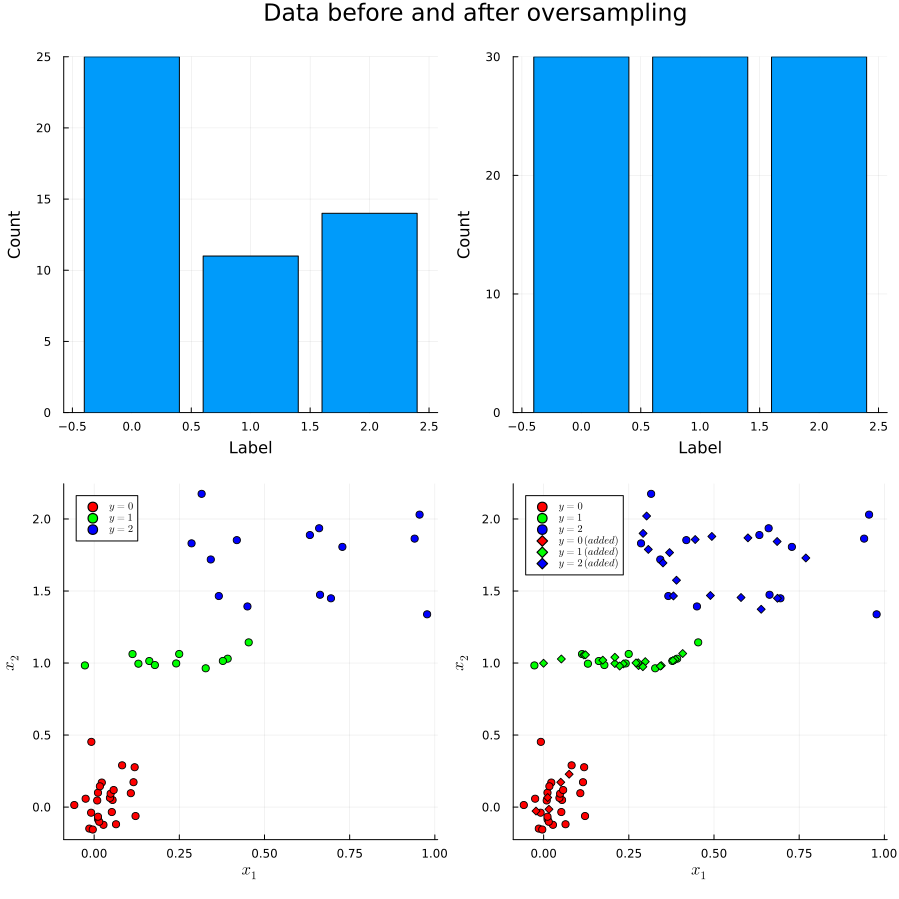

In [18]:
include("plot.jl")                      # provides a plot function to compare results
plot_data(y, yover, X, Xover)